In [ ]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
def extract_images(folder_path):
    images = os.listdir(folder_path)
    color_images = []
    depth_images = []
    for item in images:
        img = cv.imread(f"{folder_path}/{item}")
        if "color" in item:
            color_images.append(img)
        else:
            depth_images.append(img)
    
    return color_images, depth_images

def visualize_color_images(images):
    col = 2
    row = math.ceil(len(images) / 2)
    fig, ax = plt.subplots(row, col, figsize=(10,15))
    
    for idx, image in enumerate(images):
        assert image is not None
        ax = ax.flatten()
        rgb_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        ax[idx].imshow(rgb_img)
        ax[idx].axis("off")
        # ax[idx].show_title(False)
    
        
def visualize_depth_images(images):
    col = 2
    row = math.ceil(len(images) / 2)
    fig, ax = plt.subplots(row, col, figsize=(10,15))

    for idx, image in enumerate(images):
        assert image is not None
        ax = ax.flatten()
        img_normalized = cv.normalize(image, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
        ax[idx].imshow(img_normalized)
        ax[idx].axis("off")
        # ax[idx].show_title(False)
        
               
       

In [ ]:
folder_path_1 = "../data_raw/M01/words/02/"

folders = os.listdir(folder_path_1)
for folder in folders:
    color_images, depth_images = extract_images(f"{folder_path_1}/{folder}") 
    print(f"{folder}\n")
    visualize_color_images(color_images)
    visualize_depth_images(depth_images)
    



In [4]:
# Check the number of images available for each words and phrases

In [11]:
folder_path = "../data_raw"
words_dict = {
    '01': 0,
    '02': 0,
    '03': 0,
    '04': 0,
    '05': 0,
    '06': 0,
    '07': 0,
    '08': 0,
    '09': 0,
    '10': 0,
}
phrases_dict = {
    '01': 0,
    '02': 0,
    '03': 0,
    '04': 0,
    '05': 0,
    '06': 0,
    '07': 0,
    '08': 0,
    '09': 0,
    '10': 0,
}

"../data_raw/M01/words/02/"
people = os.listdir(folder_path) # List of people
type = ["phrases", "words"]

for person in people: 
    if person == "calib.txt": 
        continue
    for i in range(2): # for words and phrases
        labels = os.listdir(f"{folder_path}/{person}/{type[i]}") # label (each word or phrase) 
        for label in labels:
            iters = os.listdir(f"{folder_path}/{person}/{type[i]}/{label}") # Iteration (each iteration of a word or phrase for a single person)
            for iter in iters: # Each iteration of the word / phrases
                images = os.listdir(f"{folder_path}/{person}/{type[i]}/{label}/{iter}")
                if i == 1:
                    words_dict[label] += len(images)
                else:
                    phrases_dict[label] += len(images)

               
                

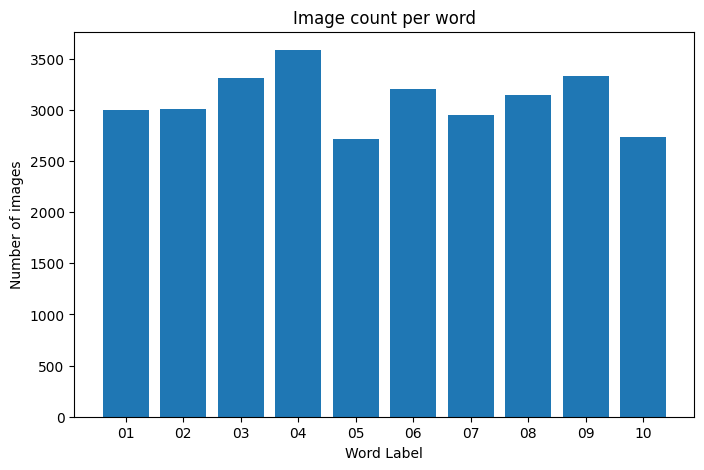

In [12]:
plt.figure(figsize=(8,5))
plt.bar(words_dict.keys(), words_dict.values())
plt.xlabel('Word Label')
plt.ylabel('Number of images')
plt.title('Image count per word')
plt.show()   

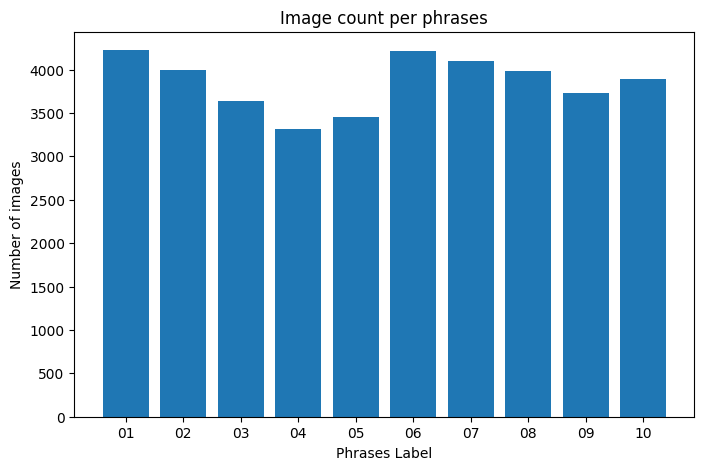

In [13]:
plt.figure(figsize=(8,5))
plt.bar(phrases_dict.keys(), phrases_dict.values())
plt.xlabel('Phrases Label')
plt.ylabel('Number of images')
plt.title('Image count per phrases')
plt.show()   